In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

2024-05-21 15:00:13.084967: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 15:00:13.085080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 15:00:13.289111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load dataset
dataset_path = '/kaggle/input/crazycoffee-leafdataset/CoLeaf DATASET'
train_dataset = image_dataset_from_directory(dataset_path, validation_split=0.2, subset="training", seed=123, image_size=(224, 224), batch_size=32)
val_dataset = image_dataset_from_directory(dataset_path, validation_split=0.2, subset="validation", seed=123, image_size=(224, 224), batch_size=32)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Normalization
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 1006 files belonging to 10 classes.
Using 805 files for training.
Found 1006 files belonging to 10 classes.
Using 201 files for validation.


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.1921 - loss: 3.0714 - val_accuracy: 0.2736 - val_loss: 1.8964
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.3669 - loss: 1.7684 - val_accuracy: 0.3781 - val_loss: 1.7339
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.4608 - loss: 1.4957 - val_accuracy: 0.4328 - val_loss: 1.5806
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5121 - loss: 1.3793 - val_accuracy: 0.4378 - val_loss: 1.6133
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6313 - loss: 1.0629 - val_accuracy: 0.4925 - val_loss: 1.4528
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.6900 - loss: 0.8260 - val_accuracy: 0.5025 - val_loss: 1.4770
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7559 - loss: 0.7269 - val_accuracy: 0.4527 - val_loss: 1.9672
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7930 - loss: 0.5631 - val_accuracy: 0.4726 - val_

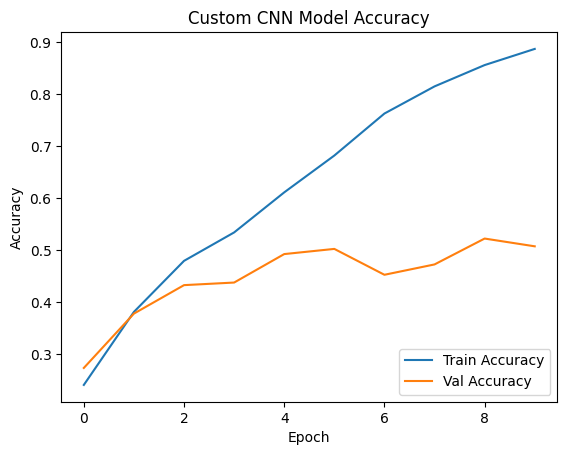

In [3]:
# Define Custom CNN Model
def create_custom_cnn():
    model = models.Sequential([
        tf.keras.Input(shape=(224, 224, 3)),  # Use Input layer explicitly
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # Assuming 10 classes
    ])
    return model

custom_cnn = create_custom_cnn()
custom_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Custom CNN Model
checkpoint_cnn = ModelCheckpoint('custom_cnn_best.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop_cnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn = custom_cnn.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[checkpoint_cnn, early_stop_cnn])

# Plot training and validation accuracy for Custom CNN Model
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Custom CNN Model Accuracy')
plt.show()


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 469s 14s/step - accuracy: 0.3584 - loss: 1.8743 - val_accuracy: 0.1393 - val_loss: 2.3974
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 368s 14s/step - accuracy: 0.4430 - loss: 1.5361 - val_accuracy: 0.0995 - val_loss: 2.5828
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 381s 14s/step - accuracy: 0.4635 - loss: 1.4402 - val_accuracy: 0.0299 - val_loss: 2.7858
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 358s 13s/step - accuracy: 0.5322 - loss: 1.3195 - val_accuracy: 0.0945 - val_loss: 4.6119
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 382s 13s/step - accuracy: 0.5491 - loss: 1.2404 - val_accuracy: 0.1244 - val_loss: 7.2663
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 356s 13s/step - accuracy: 0.5091 - loss: 1.2794 - val_accuracy: 0.1493 - val_loss: 3.2261


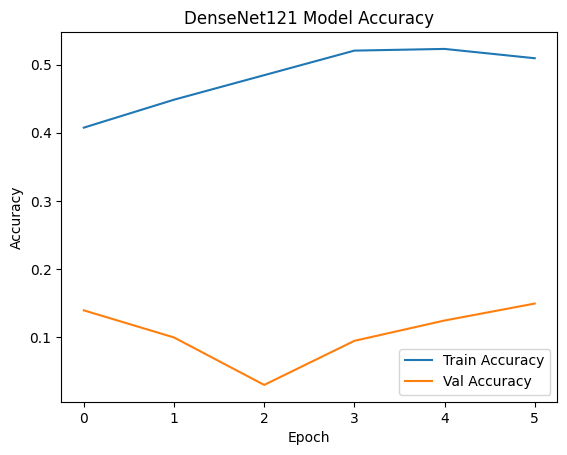

In [4]:
# Define DenseNet121 Model without Pre-trained Weights
densenet = DenseNet121(weights=None, input_shape=(224, 224, 3), include_top=False)
densenet.trainable = True  # Train the entire model

# Add custom layers on top
model_densenet = models.Sequential([
    densenet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 classes
])

model_densenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train DenseNet121 Model
checkpoint_densenet = ModelCheckpoint('densenet_best.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stop_densenet = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_densenet = model_densenet.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[checkpoint_densenet, early_stop_densenet])

# Plot training and validation accuracy for DenseNet121 Model
plt.plot(history_densenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('DenseNet121 Model Accuracy')
plt.show()

In [5]:
# Evaluate both models
custom_cnn_loss, custom_cnn_accuracy = custom_cnn.evaluate(val_dataset)
densenet_loss, densenet_accuracy = model_densenet.evaluate(val_dataset)

print(f"Custom CNN Model - Loss: {custom_cnn_loss}, Accuracy: {custom_cnn_accuracy}")
print(f"DenseNet121 Model - Loss: {densenet_loss}, Accuracy: {densenet_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 433ms/step - accuracy: 0.4865 - loss: 1.4632
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.1327 - loss: 2.3657
Custom CNN Model - Loss: 1.4528374671936035, Accuracy: 0.49253731966018677
DenseNet121 Model - Loss: 2.3973934650421143, Accuracy: 0.13930347561836243


Custom CNN Model Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step


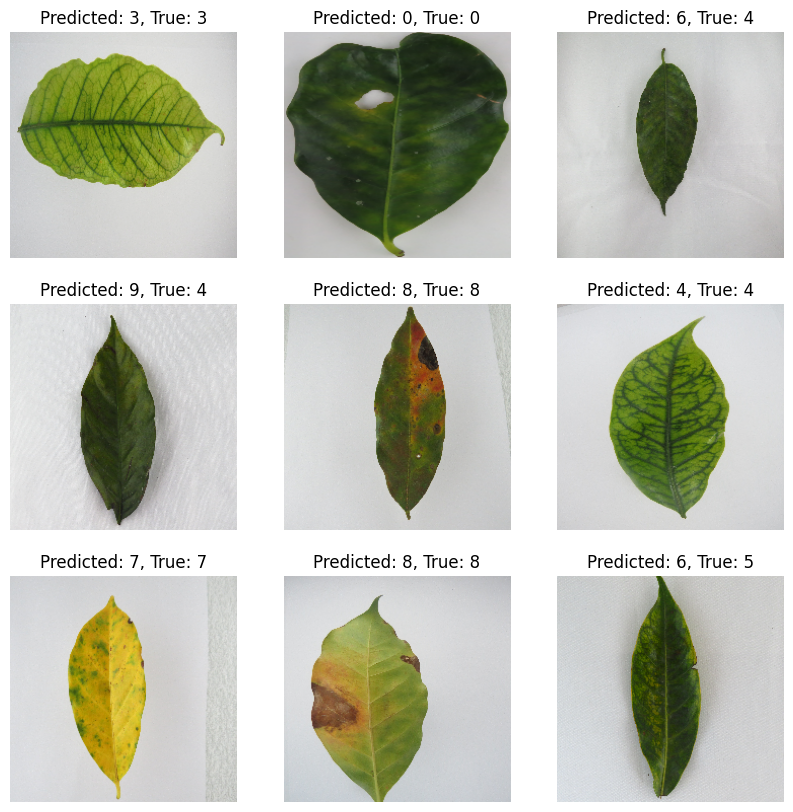

DenseNet121 Model Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


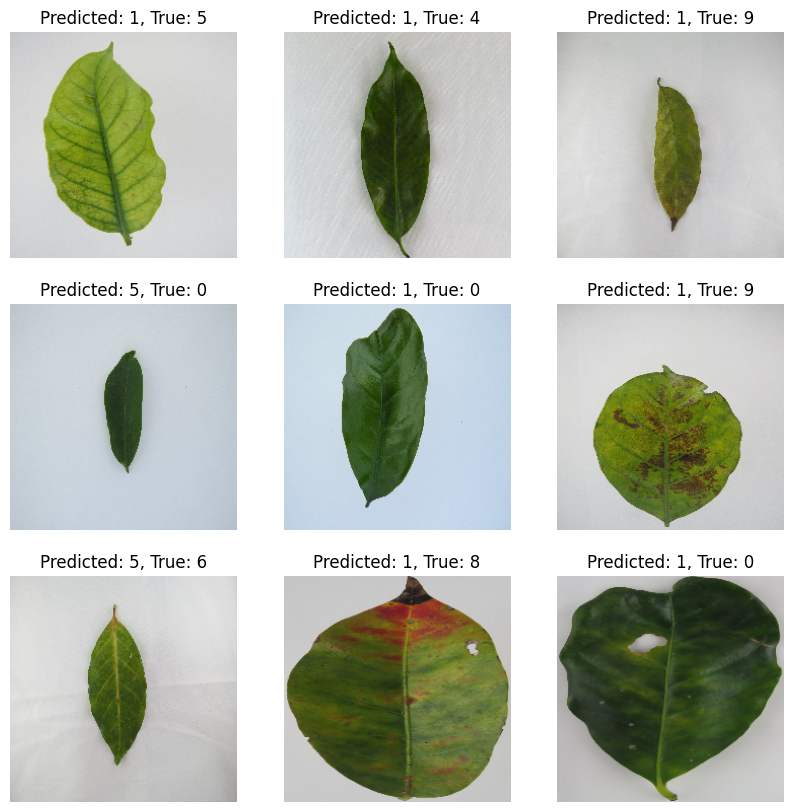

In [6]:
# Visualize some predictions
def plot_predictions(model, dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        for i in range(9):
            plt.subplot(3, 3, i+1)
            image = images[i].numpy()
            image = (image * 255).astype(np.uint8)  # Scale back to [0, 255] range
            plt.imshow(image)
            plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {labels[i].numpy()}")
            plt.axis("off")
    plt.show()

print("Custom CNN Model Predictions:")
plot_predictions(custom_cnn, val_dataset)

print("DenseNet121 Model Predictions:")
plot_predictions(model_densenet, val_dataset)